# Robert Haire DIS
<p>This is a notebook of some of my previous work, I tried to only include code I could get to run, I can share some of my github repo's with you if you would like dig around in those.</p>
<p>The first few cells are in Python and the last few are in R.</p>

## This code if from: ExperDesignDataAnalysis - CAP2753 - Spring 2022

In [ ]:

# %% [markdown]
# # Robert Haire
# # Homework 4
#

# %% [markdown]
# ## Imports
#     Had trouble getting packages to work with anaconda and base, so I just worked out of base python and installed the packages as I go along.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import doex
# from pydataset import data


# %% [markdown]
# # 1
#     Column A of the file contains a list of all the counties in alphabetical order while Column B contains the corresponding states.
#     Choose two states based on the first letter of your first and last names. For example, with the name, Victoria Albert, you would choose one state from the list (VA, VT) and another from (AL, AR, AZ).
#     Your program should print the file containing demographic data for each of the two states that you have selected.
#
#     Robert: Rhode Island
#     Haire: no h, so will use Utah

# %% [markdown]
# Sources: https://www.w3schools.com/python/python_file_write.asp

# %%
df_county_demographics = pd.read_csv("Homework4/data/county_demographics.csv")

first_name_state = df_county_demographics.loc[df_county_demographics['State'] == 'RI']
last_name_state = df_county_demographics.loc[df_county_demographics['State'] == 'UT']

hw4_num1_haire = open("hw4_num1_haire.txt", "w")
hw4_num1_haire = [first_name_state, last_name_state]
print(hw4_num1_haire)

# tmp = open("hw4_num1_haire.txt", "r")
# print(tmp.read())
# tmp.close()


# %% [markdown]
# # 2
#     Compare descriptive statistics (mean, median, standard deviation, quantiles, etc.) for the three age categories shown
#     (65 years and older, under 18 years, and under 5 years)
#     for all the counties in the two states selected in Part 1.

# %%
# fn_over65 = first_name_state['Age.Percent Above 65 Years'] # Over 65 is not working for some reason...
fn_under18 = first_name_state['Age.Percent Under 18 Years']
fn_under5 = first_name_state['Age.Percent Under 5 Years']
ln_over65 = last_name_state['Age.Percent 65 and Older']
ln_under18 = last_name_state['Age.Percent Under 18 Years']
ln_under5 = last_name_state['Age.Percent Under 5 Years']

# y1 = fn_over65.describe()  # describe will do the summary statistics for the dataset, ie mean, median, mode, etc
y2 = fn_under18.describe()
y3 = fn_under5.describe()
y4 = ln_over65.describe()
y5 = ln_under18.describe()
y6 = ln_under5.describe()

print("Fisrt name Summary Statistics for under 18:\n{}\n"
        "Under 5:\n{}\n"
        "Last name Summary Statistics for ober 65:\n{}\n"
        "Under 18:\n{}\n"
        "Under 5:\n{}\n"
        .format(y2,y3,y4,y5,y6))


# %% [markdown]
# # 3
#     Compare the data presented in columns O, P, and Q for the two states using boxplots.
#
# Will need togo into the df and pull out the columns into different variables

# %% [markdown]
# ### Small test below to make sure i am getting the summary statistics needed to plot a box plot

# %%
fn_o = first_name_state['Ethnicities.White Alone']
tmp_1 = fn_o.describe()
print(tmp_1)

# %% [markdown]
# ### Main Comparision for problem 3

# %%
fn_o = first_name_state['Ethnicities.White Alone']
fn_p = first_name_state['Ethnicities.White Alone	 not Hispanic or Latino']
fn_q = first_name_state['Housing.Homeownership Rate']
ln_o = last_name_state['Ethnicities.White Alone']
ln_p = last_name_state['Ethnicities.White Alone	 not Hispanic or Latino']
ln_q = last_name_state['Housing.Homeownership Rate']

tmp = fn_o.describe()
tmp1 = ln_o.describe()

plt.boxplot(fn_o)
plt.boxplot(fn_p)
plt.boxplot(fn_q)
plt.boxplot(ln_o)
plt.boxplot(ln_p)
plt.boxplot(ln_q)
plt.show

# %% [markdown]
# I do not like how they are all in one plot, lets seperate.
# - source: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html#stacking-subplots-in-one-direction

# %%
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)
fig.suptitle('Horizontally stacked subplots')
ax1.boxplot(fn_o)
ax2.boxplot(fn_p)
ax3.boxplot(fn_q)
ax4.boxplot(ln_o)
ax5.boxplot(fn_p)
ax6.boxplot(fn_q)
plt.show()

# %%


# %% [markdown]
# # 4
#     Choose any three ethnicities and compare data for the two states using of scatter plots.

# %%


# Storing each selected df column from each state df into a new variable
ef1 = first_name_state['Ethnicities.American Indian and Alaska Native Alone']
ef2 = first_name_state['Ethnicities.Asian Alone']
ef3 = first_name_state['Ethnicities.Black Alone']
el1 = last_name_state['Ethnicities.American Indian and Alaska Native Alone']
el2 = last_name_state['Ethnicities.Asian Alone']
el3 = last_name_state['Ethnicities.Black Alone']

# result = f_oneway(ef1, ef2, ef3)
# result_1 = f_oneway(el1, el2, el3)
# print(result, result_1)

# %% [markdown]
# The code below does not work bc the df are different sizes, tried to change the type, and various other ways but non of them worked.

# %%
# plt.scatter(ef1, el1)
# plt.show


# %% [markdown]
# I can take the summary statics of each df and plot them, the .describe() will return same sized df that can be ploted using scatter plot

# %%

def1 = ef1.describe()
def2 = ef2.describe()
def3 = ef3.describe()
del1 = el1.describe()
del2 = el2.describe()
del3 = el3.describe()

plt.scatter(def1, del1)
plt.scatter(def2, del2)
plt.scatter(def3, del3)
plt.show()


# %% [markdown]
# # 5
#     Compare the data in columns X and Z for the two states using histogram.

# %% [markdown]
# Need to generate the size of the block buy using doex

# %%

xf1 = first_name_state['Miscellaneous.Foreign Born']
zf1 = first_name_state['Miscellaneous.Language Other than English at Home']
xl1 = last_name_state['Miscellaneous.Foreign Born']
zl1 = last_name_state['Miscellaneous.Language Other than English at Home']

bxf1 = doex.RandomizedCompleteBlockDesign([xf1])
bzf1 = doex.RandomizedCompleteBlockDesign([zf1])
bxl1 = doex.RandomizedCompleteBlockDesign([xl1])
bzl1 = doex.RandomizedCompleteBlockDesign([zl1])

# %%
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
ax1.hist(xf1, bins=4)
ax2.hist(zf1, bins=4)
ax3.hist(xl1, bins=28)
ax4.hist(zl1, bins=28)
plt.show()


## The code below is from Intro to Python - COP4045 - Fall of 2020

In [2]:
# robert haire
# cop 4045 - python - fall 2020
# homework 5
#   problem 2

import functools

#####
# a
#

def gen_rndtup(m):
    q = [(a%m,b%m) for a in rnd_gen(1,10) for b in rnd_gen(1,10)]
    print (q, end=" ")

def rnd_gen(xO, n):
    counter = 0
    a = 22695477
    m = 2**32
    c = 1
    seed = xO
    # iteration = n
    while True:
        seed = (a * seed + c) % m
        yield seed
        counter +=1

        if counter >= n:
            break

g = gen_rndtup(10)

#####
# b
#

# functions from https://docs.python.org/3/library/itertools.html#itertools.islice
def islice(iterable, *args):
    # islice('ABCDEFG', 2) --> A B
    # islice('ABCDEFG', 2, 4) --> C D
    # islice('ABCDEFG', 2, None) --> C D E F G
    # islice('ABCDEFG', 0, None, 2) --> A C E G
    s = slice(*args)
    start, stop, step = s.start or 0, s.stop or sys.maxsize, s.step or 1
    it = iter(range(start, stop, step))
    try:
        nexti = next(it)
    except StopIteration:
        # Consume *iterable* up to the *start* position.
        for i, element in zip(range(start), iterable):
            pass
        return
    try:
        for i, element in enumerate(iterable):
            if i == nexti:
                yield element
                nexti = next(it)
    except StopIteration:
        # Consume to *stop*.
        for i, element in zip(range(i + 1, stop), iterable):
            pass

def filterfalse(predicate, iterable):
    # filterfalse(lambda x: x%2, range(10)) --> 0 2 4 6 8
    if predicate is None:
        predicate = bool
    for x in iterable:
        if not predicate(x):
            yield x

# print(islice(filterfalse(lambda a,b: a + b)))

#####
# c
#

# [r for r in gen_rndtup(m, zip(a,b))]

#####
# d
#



def main():
    print('main \n')


if __name__ == "__main__":
    main()

[(8, 8), (8, 5), (8, 0), (8, 1), (8, 2), (8, 9), (8, 0), (8, 3), (8, 4), (8, 3), (5, 8), (5, 5), (5, 0), (5, 1), (5, 2), (5, 9), (5, 0), (5, 3), (5, 4), (5, 3), (0, 8), (0, 5), (0, 0), (0, 1), (0, 2), (0, 9), (0, 0), (0, 3), (0, 4), (0, 3), (1, 8), (1, 5), (1, 0), (1, 1), (1, 2), (1, 9), (1, 0), (1, 3), (1, 4), (1, 3), (2, 8), (2, 5), (2, 0), (2, 1), (2, 2), (2, 9), (2, 0), (2, 3), (2, 4), (2, 3), (9, 8), (9, 5), (9, 0), (9, 1), (9, 2), (9, 9), (9, 0), (9, 3), (9, 4), (9, 3), (0, 8), (0, 5), (0, 0), (0, 1), (0, 2), (0, 9), (0, 0), (0, 3), (0, 4), (0, 3), (3, 8), (3, 5), (3, 0), (3, 1), (3, 2), (3, 9), (3, 0), (3, 3), (3, 4), (3, 3), (4, 8), (4, 5), (4, 0), (4, 1), (4, 2), (4, 9), (4, 0), (4, 3), (4, 4), (4, 3), (3, 8), (3, 5), (3, 0), (3, 1), (3, 2), (3, 9), (3, 0), (3, 3), (3, 4), (3, 3)] 

TypeError: filterfalse() missing 1 required positional argument: 'iterable'

In [ ]:
# robert haire
# cop 4045 - python - fall 2020
# homework 5
#   problem 1

########
# a
#

class RndSeq():
    """ generates the sequence of n pseudo-random nuymbers
    based on Linear Congruential Generator (LCG)
        m = 2**32
        a = 22695477
        c = 1
        seed = x
    """
    xO = 0 # seed
    n = 0 # number of iterations

    # #creation of object methods
    def __init__(self,xO,n):
        self.m = 2**32
        self.a = 22695477
        self.c = 1
        self.seed = xO # seed
        self.n_ = n # number of iterations
        self.next_index = 0

    def __iter__(self):
        return self

    def __next__(self):
        """Linear congruential generator from wikipedia:
        https://en.wikipedia.org/wiki/Linear_congruential_generator
        """

        if self.next_index >= self.n_:
            raise StopIteration
        else:
            # generates rand rumber using return, need to use yield
            ret = self.seed
            self.seed = (self.a * self.seed + self.c) % self.m
            self.next_index += 1
            return ret

########
# b
#

def rnd_gen(xO, n):
    counter = 0
    a = 22695477
    m = 2**32
    c = 1
    seed = xO
    # iteration = n
    while True:
        seed = (a * seed + c) % m
        yield seed
        counter +=1

        if counter >= n:
            break

def main():
    print('main \n')

    # # a
    print("part A: \n")
    for i in RndSeq(1,10):
       print(i, end=" ")
    print("\n")

    # # b
    print("part B: \n")
    for f in rnd_gen(1,10):
        #while True:
        print(f, end=" ")
    print("\n")

    # # print all primes
    print("primes: \n")
    for num in rnd_gen(2,10):
        if num > 1:
            for i in range(2,num):
                if(num % i) == 0:
                    break
                else:
                    print(num)
                    break

if __name__ == "__main__":
    main()

Today we will be solving a quadric equation. Please enter the coefficients.
one solution: -1.0


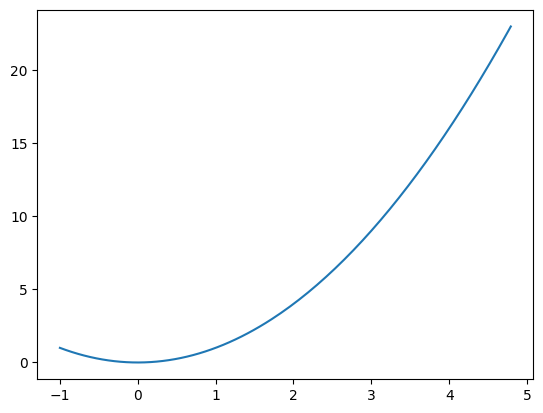

Today we will be solving a quadric equation. Please enter the coefficients.
one solution: -1.0


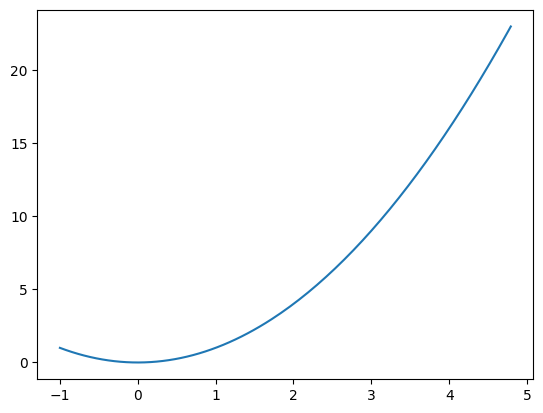

Today we will be solving a quadric equation. Please enter the coefficients.
good bye :~)


In [8]:
# robert haire
# cop 4045 - pthon programing - fall 2020
# homework 1
#   problem 1 - quadratic equations



import math
import numpy as np
import matplotlib.pyplot as plt



# ----------
# part 1
# ----------
#solve quad eqn with floats for user input

while True:
    """
    Asking for user's input to solve the quadratic equation.
    After input has been recieved, goes into if statements to determine the roots.
    If the the 'sqrt' is less than zero, then the roots are complex, 'no real solutions'
        will be displayed
    Else if the 'sqrt' is equal to zero, one solution of 'x1' will be diplayed
    Else if the 'sqrt' is greater than zero, then the roots are distint, 'x1' and 'x2' will
        be displayed
    """

    print("Today we will be solving a quadric equation. Please enter the coefficients.")
    # to stop the loop and end the program the user just types the ENTER key instead
    #   of the string for the coeffient a.
    aStr = input("Type the coefficient 'a' to be used (type 1): ")

    if not aStr:
        print("good bye :~)")
        break
    else:
        bStr = input("Type the coefficient 'b' to be used (type 2): ")
        cStr = input("Type the coefficient 'c' to be used (type 1): ")
        a = float(aStr)
        b = float(bStr)
        c = float(cStr)

        radical = (b**2)-(4*a*c)

        if radical < 0:
            print("no real solutions")
        elif radical == 0:
            x1 = ((- b + (math.sqrt(radical))) / (2*a))
            print("one solution: {}".format(x1))
        elif radical > 0:
            x1 = ((- b + (math.sqrt(radical))) / (2*a))
            x2 = ((b + (math.sqrt(radical))) / (2*a))
            print("two solutions: x1 = {}, and x2 = {}".format(x1,x2))

        # ----------
        # part 2
        # ----------
        # graph

        x = np.linspace(x1, x2, 150)
        y = x**2
        plt.plot(x,y)
        plt.show()





In [10]:
# robert haire
# cop 4045 - pthon programing - fall 2020
# homework 1
#   problem 2 - pythagorean numbers

import math


def find_Pythagorean(n):
    """ Take postive input int that computes and displays to terminal
            alll posible pythagreom triple a,b,c.
        Define function find_Pythagorean(n) that reutnr a list with (a,b,c).
    """
    for c in range(n):
        for b in range(1, c):
            for a in range(1, b):
                lhs = (a ** 2 + b ** 2)
                rhs = (c ** 2)
                if lhs / rhs == 1:
                    print("lhs/rhs is equal to 1: ",a, b, c)
                else:
                    print("lhs/rhs does not equal 1: ", a,b,c)


n = int(input("input n (type 5): "))
find_Pythagorean(n)


## Below is from Tools for Data science that I took with you during the fall of 2021, it's in R

In [12]:
---
title: "Assignment #6: Tuberculosis"
output: html_notebook
author: "Robert Haire"
---

<p>In this assignment I will be looking at the tuberculosis (TB) dataset provided by the [World Health Organization (WHO)](https://www.who.int) that is apart of the [Tidyverse](https://www.tidyverse.org) package.</p>

<p>The data comes from the 2014 World Health Organization Global Tuberculosis Report, available at http://www.who.int/tb/country/data/download/en/.</p>


## Packages and Imports

```{r}
library(tidyverse)
library(dplyr)
library(ggplot2)
```

# Part 1: Tidying up the data

<p>Storing the tidied data into the variable `var_who` to make it easier to access later.</p>

```{r}
var_who <- who %>%
  pivot_longer(
    cols = new_sp_m014:newrel_f65,
    names_to = "key",
    values_to = "cases",
    values_drop_na = TRUE
  ) %>%
  mutate(
    key = stringr::str_replace(key, "newrel", "new_rel")
  ) %>%
  separate(key, c("new", "var", "sexage")) %>%
  select(-new, -iso2, -iso3) %>%
  separate(sexage, c("sex", "age"), sep = 1)

view(var_who)
```

# Part 2: Exploritory Data Analysis (EDA)

QUESTION 1: Which countries had the largest and smallest number of TB cases in 2012?

Smallest Number of cases in 2012:

```{r}
least_cases <- var_who %>%
  filter(cases < 1 | year == 2012)  %>%
  distinct(country)

view(least_cases)

print.data.frame(least_cases)
```

- I filtered the dataset to only show cases that are zero and within the year 2012. Then I removed the duplicates and printed the dataframe.
- Don't like how it prints but can work on that more later.
  - print.data.frame: Printing Data Frames:  https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/print.data.frame

Largest Number of cases in 2012:

```{r}
tmp <- var_who %>%
  filter(year == 2012)  %>%
  group_by(country, cases) %>%
  tally(cases, sort = TRUE)

#view(tmp)

largest_cases_country <- tmp$country[1]
largest_cases_cases <- tmp$cases[1]

sprintf("The largest number of cases in 2012 comes from %s with %d cases.", largest_cases_country, largest_cases_cases)
```

Much better way to print. Looked back on previous assignment, needed to remove the information from the dataframe then print it to make it nicer.

QUESTION 2: Plot the number of cases per gender for Australia over time, for the period covered in the dataset for that country.

```{r}
tmp_m <- var_who %>%
  filter(country == "Australia" & sex == "m")
tmp_f <- var_who %>%
  filter(country == "Australia" & sex == "f")

ggplot() +
  geom_smooth(data = tmp_m, mapping = aes(year, cases, color = sex)) +
  geom_smooth(data = tmp_f, mapping = aes(year, cases, color = sex))
```

QUESTION 3: Plot the total number of cases per gender for Afghanistan over time, for the period between 2000 and 2013.

```{r}
tmp_m <- var_who %>%
  filter(country == "Afghanistan" & sex == "m")
tmp_f <- var_who %>%
  filter(country == "Afghanistan" & sex == "f")

ggplot() +
  geom_smooth(data = tmp_m, mapping = aes(year, cases, color = sex)) +
  geom_smooth(data = tmp_f, mapping = aes(year, cases, color = sex))
```

QUESTION 4: Compute and plot (pie chart?) the percentage of cases per age group for the 3 North American countries of largest population (USA, Canada and Mexico) in the longest possible period covered by the dataset for all those countries.

```{r}
tmp <- var_who %>%
  filter(country == "United States of America" & year >= 1996 | country == "Canada" & year >= 1996 | country == "Mexico" & year >= 1996)
```

- each country had to be filtered by the year otherwise it will only filter by year of the adjacent argument.

- now lets plot it

```{r}
d <- ggplot(tmp, aes(age))
r <- d + geom_bar()
r + coord_polar(theta = "x", direction=1)
```

- this does not look right...

```{r}
ggplot(tmp, aes(x="", y=cases, fill=age)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)
```


SyntaxError: invalid character '“' (U+201C) (1908344900.py, line 70)

## The code below is from Intro to Data Science - CAP4773 - spring 2021 and is also in R

In [ ]:
---
title: "Homework 3"
output:
  html_document:
    df_print: paged
---

## will be using the College dataset in the ISLR package
- loading the package and dataset in
```{r}
library(ISLR)
summary(College)
library(ggplot2)
library(tidyverse)
# install.packages("class")
# set.seed(1)
#library(class)
#attach(College)
#attach(Default)
```

## make predictions about a college’s out-of-state tuition from all other variables in College

```{r}
lm.fit = lm(formula = Outstate ~ Private + Apps + Accept + Enroll + Top10perc + Top25perc + F.Undergrad + P.Undergrad + Room.Board + Books + Personal + PhD + Terminal + S.F.Ratio + perc.alumni + Expend + Grad.Rate, data = College)
#lm.fit

summary(lm.fit)
```

```{r}
ggplot(data = lm.fit, mapping = aes(x=(Apps + Accept + Enroll + Top10perc + Top25perc + F.Undergrad + P.Undergrad + Room.Board + Books + Personal + PhD + Terminal + S.F.Ratio + perc.alumni + Expend + Grad.Rate), y=Outstate)) + geom_jitter() + geom_smooth(method='lm', formula= y~x) + theme_bw()
```

## 2
- need to break observations that are tied as nearest neighbors in a reproducible way.
```{r}
library(class)
```


#### a

- slide 81 of classification lecture.
- about 34 min of march 17th lecture she goes over it.
```{r}
attach(College)
train = seq(1,500)
test = seq(501, 777)
train.x = cbind(College[train, 2:18])
test.x = cbind(College[test, 2:18])
train.y = Private[train]
head(test.x)
```

- need to create a vector class of labels for these features.
```{r}
#train.y <- default[train]
#train.y
```

#### b

```{r}
# k=1
set.seed(1)
knn.pred.1 = knn(train.x, test.x, train.y, k=1)
summary(knn.pred)
# k=10
set.seed(1)
knn.pred.10 = knn(train.x, test.x, train.y, k=10)
summary(knn.pred.10)
# k=100
set.seed(1)
knn.pred.100 = knn(train.x, test.x, train.y, k=100)
summary(knn.pred.100)
```

#### c
- The goal is to compare these predicted classes to their true classes.
- To make comparisons easier, let’s create a vector of true test classes
- table, predication in rows and observations in the columns
```{r}
test.y = Private[test]
table(knn.pred.1, test.y)
table(knn.pred.10, test.y)
table(knn.pred.100, test.y)
```

#### d
 - using the mean function to provide the test accuracy
- *table size is still off, gave me an answer though....
```{r}
mean(knn.pred.1 == test.y)
mean(knn.pred.10 == test.y)
mean(knn.pred.100 == test.y)
```

#### e
- Provide test error rates for your KNN classifier when K=1, 10, and 100
```{r}
1 - mean(knn.pred.1 == Private[test])
1 - mean(knn.pred.10 == Private[test])
1 - mean(knn.pred.100 == Private[test])
```


In [ ]:
---
title: "Homework 4"
output:
  html_document:
    df_print: paged
  html_notebook: default
  word_document: default
---

# 1)

```{r}
library(ISLR)

library(ggplot2)
library(tidyverse)
attach(College)
summary(College)
#install.packages("leaps")
library(leaps)
#attach(Advertising)
```

### 1.a - 1.c


```{r}
bestsub = regsubsets(x = Outstate ~ Private + Apps + Accept + Enroll + Top10perc + Top25perc + F.Undergrad + P.Undergrad + Room.Board + Books + Personal + PhD + Terminal + S.F.Ratio + perc.alumni + Expend + Grad.Rate, data = College)

forward = regsubsets(x = Outstate ~ Private + Apps + Accept + Enroll + Top10perc + Top25perc + F.Undergrad + P.Undergrad + Room.Board + Books + Personal + PhD + Terminal + S.F.Ratio + perc.alumni + Expend + Grad.Rate, data = College, method = "forward")

backward = regsubsets(x = Outstate ~ Private + Apps + Accept + Enroll + Top10perc + Top25perc + F.Undergrad + P.Undergrad + Room.Board + Books + Personal + PhD + Terminal + S.F.Ratio + perc.alumni + Expend + Grad.Rate, data = College, method = "backward")

```

```{r}
#summary(bestsub)
bestsub.sum = summary(bestsub)
# names(bestsub.sum)

bestsub.sum$adjr2
bestsub.sum$cp
bestsub.sum$bic
```

```{r}
forward.sum = summary(forward)
# names(forward.sum)
forward.sum$adjr2
forward.sum$cp
forward.sum$bic

```

```{r}
backward.sum = summary(backward)
backward.sum$adjr2
backward.sum$cp
backward.sum$bic
```

```{r}
summary(bestsub)
summary(forward)
summary(backward)
```

```{r}
summary(Expend)
```

### 1f
- three estimates for the number of features in the overal 'best' model
```{r}
coef(backward, 3)
coef(bestsub, 3)
```


# 2

```{r}
# create the training set
set.seed(1)
train = sample(c(TRUE, FALSE), nrow(College), rep = TRUE)

# us remaining data at test set
test = (!train)
```

- performing regularization in R
```{r}
# install.packages("glmnet")
library(glmnet)
```

- us `glmnet()` to create a matrix of features of College
```{r}
features = model.matrix(Outstate ~ ., data = College)[,-1]
```

- tuning lambda
```{r}
set.seed(1)
cv.out = cv.glmnet(features[train,], College$Outstate[train], alpha = 0)

# get the lambda by taking the min of CV error
bestlam = cv.out$lambda.min
bestlam
```

- preforming ridge regression on College
```{r}
ridge = glmnet(x = features[train,], y = College$Outstate[train], alpha = 0, lambda = bestlam)
```

- calculate the test MSE for the value of lambda yielding the smallest CV error
```{r}
ridge.pred = predict(ridge, s = bestlam, newx = features[test, ])
ridge.pred
mean((ridge.pred - College$Outstate[test])^2)
```

- viewing parameter estimates of ridge regression
```{r}
coef(ridge)
```

# 3
- need to select the tuning parameter for lasso
- need to perform 10-fold cross-validation with `cv.glmnet()`
```{r}
set.seed(1)
cv.out = cv.glmnet(features[train,], College$Outstate[train], alpha = 1)

# getting the value of lambda yielding the smallest CV error
bestlam = cv.out$lambda.min
bestlam
```

- performing lasso on training set
```{r}
lasso = glmnet(x = features[train,], y = College$Outstate[train], aplha = 1, lambda = bestlam)
```

- calculate the test MSE for the value of lambda yielding the smallest CV error
```{r}
lasso.pred = predict(lasso, s = bestlam, newx = features[test,])
mean((lasso.pred - College$Outstate[test])^2)
```

```{r}
lasso.pred
```
- using `coef()` to see if any features have been removed
```{r}
coef(lasso)
```
